Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.


The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. What's the distribution of the target, `price`, and features such as `longitude` and `latitude`? Remove outliers.
- [ ] After you remove outliers, what is the mean price in your subset of the data?
- [ ] Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [223]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module1')

Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
Already up to date.


In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [226]:

df.head()

bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
0        1.5         3  ...                 0                    0
1        1.0         2  ...                 0                    0
2        1.0         1  ...                 0                    0
3        1.0         1  ...                 0                    0
4        1.0         4  ...                 0                    0

[5 rows x 34 columns]

## Descriptive statistic of data

In [0]:
import pandas_profiling

# Get panda profile report
#df.profile_report()

##Data Cleaning

In [228]:
df.describe(include= 'all')

bathrooms      bedrooms  ... wheelchair_access common_outdoor_space
count   49352.00000  49352.000000  ...      49352.000000          49352.00000
unique          NaN           NaN  ...               NaN                  NaN
top             NaN           NaN  ...               NaN                  NaN
freq            NaN           NaN  ...               NaN                  NaN
mean        1.21218      1.541640  ...          0.027517              0.02620
std         0.50142      1.115018  ...          0.163585              0.15973
min         0.00000      0.000000  ...          0.000000              0.00000
25%         1.00000      1.000000  ...          0.000000              0.00000
50%         1.00000      1.000000  ...          0.000000              0.00000
75%         1.00000      2.000000  ...          0.000000              0.00000
max        10.00000      8.000000  ...          1.000000              1.00000

[11 rows x 34 columns]

In [0]:
# From Pandas profiling report there is missing values
# check for missing values
# less than 5% of the data is missing so we can drop na
#df.isna().sum()

In [0]:
#df= df.dropna(axis=0)

From data profiling price is highly skewed, so let's check for price distribution

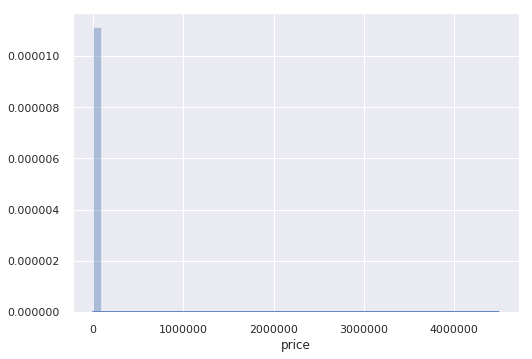

In [231]:
import seaborn as sns
sns.set() 
# plot the probablity distribution of  price
# Price has outliers(observation that lie on abnormal distance from other observation of the data)
sns.distplot(df['price']);

In [232]:
df.price.describe()

count    4.935200e+04
mean     3.830174e+03
std      2.206687e+04
min      4.300000e+01
25%      2.500000e+03
50%      3.150000e+03
75%      4.100000e+03
max      4.490000e+06
Name: price, dtype: float64

In [233]:
# check the miximum sal price
# This apartment has only 1 bathroom and 2 bedrooms 
# aparment has no address descripion
df.query('price == 4490000')

bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
19558        1.0         2  ...                 0                    0

[1 rows x 34 columns]

In [0]:
# Price is hard to read in scientific notation
# Format the numbers: comma seperator for thousand and zero decimal
#pd.options.display.float_format = '{:,.4f}'.format
#df.price.describe()

In [235]:
# check min sell price
# this apartment has only bathroom nad no bedroom
# address description is missing
df.query('price==43')

bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
28626        1.0         0  ...                 0                    0

[1 rows x 34 columns]

In [236]:
# check the range of price from 1 to 99 percentile
df['price'].quantile([0.01,0.5, 0.99])

0.01     1475.0
0.50     3150.0
0.99    13000.0
Name: price, dtype: float64

In [237]:
# we can remove the outlier
# we can remove 1% of the obsevation  using quantile method
q_99 = df['price'].quantile(0.99)
q_1 = df['price'].quantile(0.01)
#df = df.query('price < q')
df= df[(df['price']>= q_1) & (df['price']<= q_99)]
df.price.describe()

count    48379.000000
mean      3538.636888
std       1597.663167
min       1475.000000
25%       2500.000000
50%       3150.000000
75%       4065.000000
max      13000.000000
Name: price, dtype: float64

# For latitude and longitude
Latitude and Longitude are the units that represent the coordinates at geographic coordinate system. to get the address of city or street

In [238]:
  df[['latitude', 'longitude']].describe()

latitude     longitude
count  48379.000000  48379.000000
mean      40.741666    -73.957078
std        0.617128      1.137729
min        0.000000   -118.271000
25%       40.728200    -73.991800
50%       40.751600    -73.978100
75%       40.773900    -73.955200
max       43.034600      0.000000

New York City lat, long is 40.661, -73.944

https://tools.wmflabs.org/geohack/geohack.php?pagename=New_York_City&params=40.661_N_73.944_W_region:US-NY_type:city(8175133)

Most of the observations are near these coordinates but there are some outliers

In [239]:
# scatter plot
import plotly.express as px

px.scatter(df, x = 'latitude', y='longitude')

From scatter plot we have two outlier for two different location(0,0) and (34.0126, -118.271) let's see those two location

34, -118 is in Los Angeles: https://www.latlong.net/c/?lat=34&long=-118

42, -71 is Boston: https://www.latlong.net/c/?lat=42&long=-71

0, 0 is Null Island: https://en.wikipedia.org/wiki/Null_Island

In [240]:
df[(df['latitude']== 0) & (df['latitude']== 0)]
#df.shape

bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
2787         5.0         6  ...                 0                    0
14104        1.0         1  ...                 0                    0
21715        1.0         1  ...                 0                    0
22471        1.0         2  ...                 0                    0
25860        1.0         2  ...                 0                    0
27181        1.0         2  ...                 0                    0
34390        1.0         1  ...                 0                    0
35826        1.0         2  ...                 0                    0
36448        1.0         1  ...                 0                    0
39199        1.0         2  ...                 0                    0
42987        1.0         0  ...                 0                    0

[11 rows x 34 columns]

It would be hard to say about location without latitude and longitude(0,0) and street address without zipcode give very little information so we can remove the outlier

In [241]:
# 1 observation in LA
df[df.longitude==df.longitude.min()]

bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
22767        1.0         1  ...                 0                    0

[1 rows x 34 columns]

In [0]:
# let's see 1 to 99 percentile quantitle
def get_quantile(df, col, n):
    
    return df[df[col].quantile(n)]

In [243]:
# 12 observation at Null Island
len(df.query('longitude==0 & latitude==0'))

11

In [244]:
import numpy as np
# 99.9% of latitudes are between ...
np.percentile(df['latitude'], 0.05), np.percentile(df['latitude'], 99.95)

(40.5757189, 40.91360620000001)

In [245]:
# 99.9% of longitudes are between ...
np.percentile(df['longitude'], 0.05), np.percentile(df['longitude'], 99.95)

(-74.0446062, -73.5404347)

In [0]:
df= df[(df['latitude'] >= df['latitude'].quantile(0.01)) & (df['latitude'] <= df['latitude'].quantile(0.99))]

In [247]:
df.latitude.describe()

count    47411.000000
mean        40.750744
std          0.034600
min         40.644000
25%         40.728700
50%         40.751600
75%         40.773000
max         40.855800
Name: latitude, dtype: float64

In [248]:
df.longitude.describe()

count    47411.000000
mean       -73.973529
std          0.028048
min        -74.663700
25%        -73.991900
50%        -73.978400
75%        -73.955900
max        -73.700100
Name: longitude, dtype: float64

In [249]:
px.scatter(df, x = 'latitude', y='longitude')

In [0]:
# Since we have latitude and longitude so we don't need display and street address
#Also street and display has no zip code 
df= df.drop(['display_address', 'street_address'], axis= 1)

## Bedroom and Bathroom features

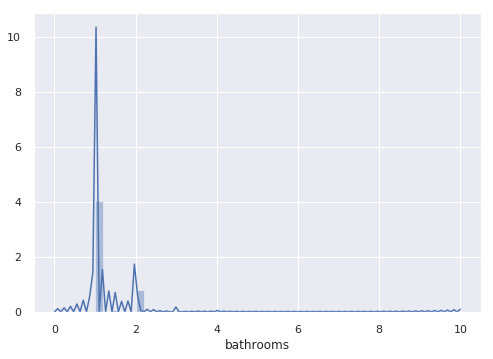

In [251]:
sns.distplot(df['bathrooms'])

In [0]:
# remove the outlier with 1 to 99% quantile
df= df[(df['bathrooms'] >= df['bathrooms'].quantile(0.01)) & (df['bathrooms'] <= df['bathrooms'].quantile(0.99))]

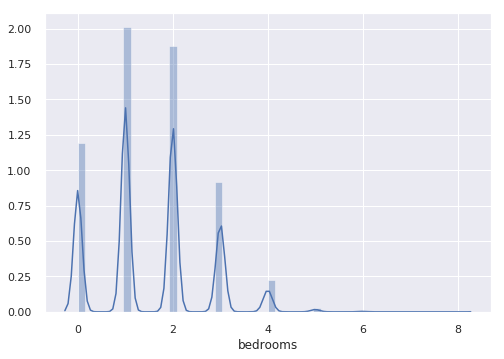

In [253]:
# distribution of the bedrooms
sns.distplot(df['bedrooms'])

In [0]:
df= df[(df['bedrooms'] >= df['bedrooms'].quantile(0.01)) & (df['bedrooms'] <= df['bedrooms'].quantile(0.99))]

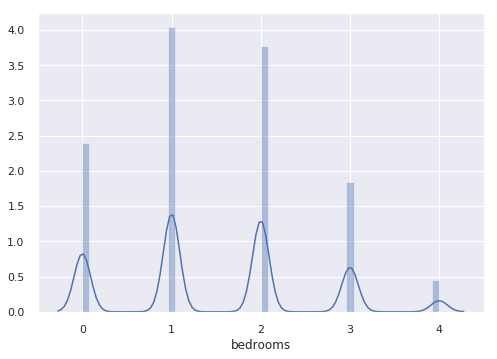

In [255]:
sns.distplot(df['bedrooms'])

In [256]:
df.isna().sum()

bathrooms                  0
bedrooms                   0
created                    0
description             1352
latitude                   0
longitude                  0
price                      0
interest_level             0
elevator                   0
cats_allowed               0
hardwood_floors            0
dogs_allowed               0
doorman                    0
dishwasher                 0
no_fee                     0
laundry_in_building        0
fitness_center             0
pre-war                    0
laundry_in_unit            0
roof_deck                  0
outdoor_space              0
dining_room                0
high_speed_internet        0
balcony                    0
swimming_pool              0
new_construction           0
terrace                    0
exclusive                  0
loft                       0
garden_patio               0
wheelchair_access          0
common_outdoor_space       0
dtype: int64

Combine dogs_allowed and cats_allowed into pets_allowed since they are redundant features with high correlation.

In [257]:
df['pet_allowed']= (df['cats_allowed'] & df['dogs_allowed'])
# drop cat and dog allowed
df= df.drop(['cats_allowed', 'dogs_allowed'], axis= 1)
df['pet_allowed'].value_counts()

0    25717
1    21075
Name: pet_allowed, dtype: int64

In [258]:
df.describe()

bathrooms      bedrooms  ...  common_outdoor_space   pet_allowed
count  46792.000000  46792.000000  ...          46792.000000  46792.000000
mean       1.193067      1.512994  ...              0.027120      0.450398
std        0.422053      1.070949  ...              0.162435      0.497539
min        1.000000      0.000000  ...              0.000000      0.000000
25%        1.000000      1.000000  ...              0.000000      0.000000
50%        1.000000      1.000000  ...              0.000000      0.000000
75%        1.000000      2.000000  ...              0.000000      1.000000
max        3.000000      4.000000  ...              1.000000      1.000000

[8 rows x 28 columns]

## avg rental price in NYC is 3537k after removal of outlier

##Plot relationship between feature and target

In [259]:
px.scatter(df, x= 'bedrooms', y='price', trendline='ols', opacity= 0.05)

##Use scikit-learn for linear regression with one feature


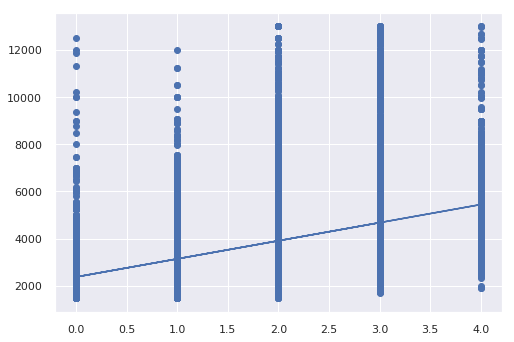

In [260]:
# import the appropriate estimator class from scikit_learn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# create the instance  of the class
model= LinearRegression()

#Arrange X Feature matrix and y target vector
features = ['bedrooms']
target = 'price'

X = df[features]
Y= df[target]

# fit the model
model.fit(X , Y)

# Apply the Predict
Y_pred = model.predict(X)

# Plot actual vs Predicted
plt.scatter(X , Y)
plt.plot(X, Y_pred)

equation for the line

In [261]:
print('y = mx + b')
print(f'y = {model.coef_[0]}X + {model.intercept_}')
print(f'price={model.coef_[0]} bedroom + {model.intercept_}')

y = mx + b
y = 767.2043317159724X + 2376.7390607761163
price=767.2043317159724 bedroom + 2376.7390607761163


##Define a function to make new predictions and explain the model coefficient

In [269]:
def prediction(bedroom):
    Y_pred= model.predict([[bedroom]])
    estimate=Y_pred[0]
    coefficient= model.coef_[0]
    # format with doolar and comma seprator
    result= f'${estimate:,.0f} estimate price for {bedroom} bedroom apartment in NYC.'
    explanation = f'each adition bedroom is associated with a ${model.coef_[0]}increase in price'
    return result + explanation
  
prediction(3)
  

'$4,678 estimate price for 3 bedroom apartment in NYC.each adition bedroom is associated with a $767.2043317159724increase in price'

In [270]:
prediction(2)

'$3,911 estimate price for 2 bedroom apartment in NYC.each adition bedroom is associated with a $767.2043317159724increase in price'

In [276]:
# rerun the prediction function interactively
from ipywidgets import interact
interact(prediction, bedroom=(0,5));

interactive(children=(IntSlider(value=2, description='bedroom', max=5), Output()), _dom_classes=('widget-inter…

##Organize and comment your code

In [278]:
from ipywidgets import interact
import pandas as pd
from sklearn.linear_model import LinearRegression

# Read New York City apartment rental listing data
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

# Arrange X features matrix & y target vector
features = ['bedrooms']
target = 'price'
X = df[features]
y = df[target]

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict
def predict(bedrooms):
    y_pred = model.predict([[bedrooms]])
    estimate = y_pred[0]
    coefficient = model.coef_[0]
    
    # Format with $ and comma separators. No decimals.
    result = f'Rent for a {bedrooms}-bedroom apartment in New York City is estimated at ${estimate:,.0f}.'
    explanation = f' Each additional bedroom is associated with a ${coefficient:,.0f} increase in this model.'
    return result + explanation

interact(predict, bedrooms=(1,4));

interactive(children=(IntSlider(value=2, description='bedrooms', max=4, min=1), Output()), _dom_classes=('widg…

##Stretch Goal

In [277]:
px.scatter_3d(df, x='bedrooms', y='bathrooms', z='price', opacity=0.05)